In [2]:
from tqdm.notebook import tqdm
import seaborn as sns
import pandas as pd
import openpyxl as op
import matplotlib.pyplot as plt

In [3]:
wb = op.load_workbook('sprint exemplo.xlsx')
ws=wb['Tasks']
ws['A3'].value

/home/luan/.cache/pypoetry/virtualenvs/apps-ZFymp6kh-py3.7/lib/python3.7/site-packages/openpyxl/reader/drawings.py:29: UserWarning: DrawingML support is incomplete and limited to charts and images only. Shapes and drawings will be lost.
  warn("DrawingML support is incomplete and limited to charts and images only. Shapes and drawings will be lost.")


'Task ID'

In [9]:
header=[]
data=[]
for kh,h in enumerate(ws.rows):
    if kh == 0 or kh == 1:
        continue
    if kh == 2:
        header=list([a.value for a in h])
        continue
    obj={}
    for colindex,cell in enumerate(h):
        valor=cell.value
        obj[header[colindex]] = valor
    data.append(obj)

In [10]:
data

[{'Task ID': '24axn3b',
  'Task Name': '[Kartado] Criar 3 unidades básicas de novo modelo de contrato (usuários)',
  'Assignee': 'Leonardo Ramos, Pedro Gasparotti, Victor Martins',
  'tags': '',
  'Time (drop down)': 'ImT',
  'Priority': 'NORMAL',
  'Status': 'SPRINT',
  'Start Date': '',
  'Due Date': '',
  'Latest Comment': '',
  'Unidade (drop down)': 'Kartado [Interno]',
  'Perfil de cliente (drop down)': ''},
 {'Task ID': '2rwwq8h',
  'Task Name': '[Kartado] Ajuste Fino do Kartado Sigaco >> CCR',
  'Assignee': 'Leonardo Ramos, Pedro Gasparotti',
  'tags': '',
  'Time (drop down)': 'ImT',
  'Priority': 'NORMAL',
  'Status': 'SPRINT',
  'Start Date': '',
  'Due Date': '',
  'Latest Comment': '',
  'Unidade (drop down)': 'Kartado [Interno]',
  'Perfil de cliente (drop down)': ''},
 {'Task ID': '370ymc1',
  'Task Name': '[Kartado] Definição de processos de ImT // Revisão Playbook',
  'Assignee': 'Leonardo Ramos, Pedro Gasparotti, Andréia Zanatta Giordani, Lucas Pereira Luiz',
  'tags'

In [5]:
counterSuporte,counterCS, counterNPlan,luan,felippe, lf=0,0,0,0,0,0
for a in data:
    if 'Inteligência'.lower() == a['Time (drop down)'].lower() or 'Felippe'.lower() in a['Assignee'].lower() or 'Luan Poletti'.lower() in a['Assignee'].lower():

        counterSuporte += 1 if 'suporte'.lower() in a['tags'].lower() else 0
        counterCS += 1 if 'cs'.lower() in a['tags'].lower() else 0
        counterNPlan += 1 if 'não planejado'.lower() in a['tags'].lower() else 0
        luan +=1 if 'Luan Poletti'.lower() == a['Assignee'].lower() else 0
counterSuporte,counterCS, counterNPlan,luan

(19, 14, 28, 16)

In [12]:
x = ['Suporte','CS','Não Planejado']
y = [counterSuporte,counterCS, counterNPlan]
# data ={
#     'tags': x,
#     'cards': y
# }
df = pd.DataFrame(data)
df.head()

/home/luan/.cache/pypoetry/virtualenvs/apps-ZFymp6kh-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  import sys


,Task ID,Task Name,Assignee,tags,Time (drop down),Priority,Status,Start Date,Due Date,Latest Comment,Unidade (drop down),Perfil de cliente (drop down)
0,24axn3b,[Kartado] Criar 3 unidades básicas de novo mod...,"Leonardo Ramos, Pedro Gasparotti, Victor Martins",,ImT,NORMAL,SPRINT,NaT,NaT,,Kartado [Interno],
1,2rwwq8h,[Kartado] Ajuste Fino do Kartado Sigaco >> CCR,"Leonardo Ramos, Pedro Gasparotti",,ImT,NORMAL,SPRINT,NaT,NaT,,Kartado [Interno],
2,370ymc1,[Kartado] Definição de processos de ImT // Rev...,"Leonardo Ramos, Pedro Gasparotti, Andréia Zana...",atenção!,ImT,NORMAL,SPRINT,2023-03-17,2023-03-21,,Transição,
3,376p297,[Kartado] Criação do treinamento de script de ...,"Leonardo Ramos, Lucas Pereira Luiz",atenção!,ImT,NORMAL,SPRINT,2022-12-19,2023-03-28,,Transição,
4,864dtcmfr,Uso de Macro:Arteris,"Andréia Zanatta Giordani, Isadora de Medeiros ...",,CSM,,SPRINT,NaT,NaT,,ARTERIS,


<AxesSubplot:xlabel='tags', ylabel='cards'>

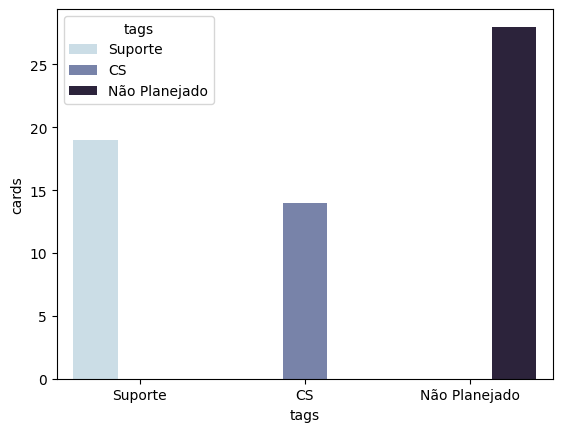

In [8]:
sns.barplot(data=df, x='tags', y='cards', palette="ch:s=.25,rot=-.25", hue='tags')

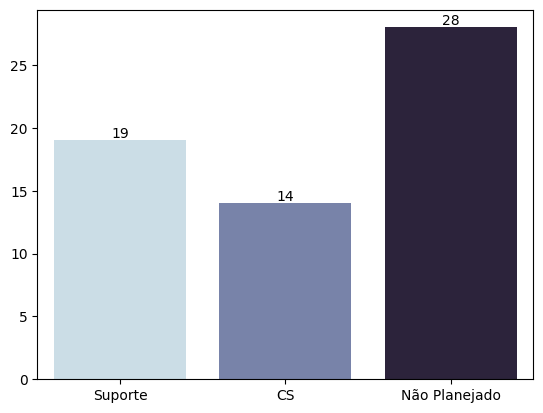

In [24]:
chart = sns.barplot(x=x, y=y, palette="ch:s=.25,rot=-.25")
for i in chart.containers:
    chart.bar_label(i,)